In [22]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import shape
from tqdm import tqdm
import random
import sklearn

In [23]:
import warnings

In [24]:
from datetime import timedelta, date, datetime as dt
import datetime

# 날씨데이터

In [ ]:
wather = pd.read_csv('날씨1.csv', encoding = 'utf-8')

In [26]:
wather

,Unnamed: 0,tm,stnNm,sumRn,maxWd
0,0,2000-01-01,부산,1.1,20.0
1,1,2000-01-02,부산,0.9,20.0
2,2,2000-01-03,부산,NaN,320.0
3,3,2000-01-04,부산,NaN,20.0
4,4,2000-01-05,부산,2.7,20.0
...,...,...,...,...,...
43235,359,2021-12-26,포항,NaN,250.0
43236,360,2021-12-27,포항,NaN,250.0
43237,361,2021-12-28,포항,NaN,230.0
43238,362,2021-12-29,포항,NaN,230.0


In [27]:
wather = wather.drop(columns = 'Unnamed: 0')
wather['tm'] = wather['tm'].apply(lambda x: x.replace('-',''))
wather = wather.rename(columns = {'tm':'침수시작'})

In [28]:
wather = wather.fillna(0)

In [29]:
wather = wather.drop(columns = 'maxWd')

In [30]:
wa_bu = wather[wather['stnNm'] == '부산']
wa_jj = wather[wather['stnNm'] == '제주'].reset_index().drop(columns = 'index')
wa_su = wather[wather['stnNm'] == '서귀포'].reset_index().drop(columns = 'index')
wa_mi = wather[wather['stnNm'] == '밀양'].reset_index().drop(columns = 'index')
wa_po = wather[wather['stnNm'] == '포항'].reset_index().drop(columns = 'index')

In [ ]:
wa_bu['sumRnn'] = 0.0
for i in range(len(wa_bu)):
    if i == 0:
        wa_bu['sumRnn'][i] = 0
    else:
        wa_bu['sumRnn'][i] = wa_bu['sumRn'][i -1]
        
        
        
wa_jj['sumRnn'] = 0.0
for i in range(len(wa_jj)):
    if i == 0:
        wa_jj['sumRnn'][i] = 0
    else:
        wa_jj['sumRnn'][i] = wa_jj['sumRn'][i -1]
        
        
        
wa_su['sumRnn'] = 0.0
for i in range(len(wa_su)):
    if i == 0:
        wa_su['sumRnn'][i] = 0
    else:
        wa_su['sumRnn'][i] = wa_su['sumRn'][i -1]

wa_mi['sumRnn'] = 0.0
for i in range(len(wa_mi)):
    if i == 0:
        wa_mi['sumRnn'][i] = 0
    else:
        wa_mi['sumRnn'][i] = wa_mi['sumRn'][i -1]
        
        
        
wa_po['sumRnn'] = 0.0
for i in range(len(wa_po)):
    if i == 0:
        wa_po['sumRnn'][i] = 0
    else:
        wa_po['sumRnn'][i] = wa_po['sumRn'][i -1]
        
        
wa_po['강수량'] = wa_po.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_jj['강수량'] = wa_jj.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_su['강수량'] = wa_su.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_mi['강수량'] = wa_mi.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_bu['강수량'] = wa_bu.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)

In [32]:
wa_bu

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20000101,부산,1.1,0.0,1.1
1,20000102,부산,0.9,1.1,2.0
2,20000103,부산,0.0,0.9,0.9
3,20000104,부산,0.0,0.0,0.0
4,20000105,부산,2.7,0.0,2.7
...,...,...,...,...,...
8643,20211226,부산,0.0,0.0,0.0
8644,20211227,부산,0.0,0.0,0.0
8645,20211228,부산,0.0,0.0,0.0
8646,20211229,부산,0.0,0.0,0.0


In [33]:
wa_jj

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20000101,제주,0.0,0.0,0.0
1,20000102,제주,0.0,0.0,0.0
2,20000103,제주,0.0,0.0,0.0
3,20000104,제주,0.0,0.0,0.0
4,20000105,제주,0.0,0.0,0.0
...,...,...,...,...,...
8643,20211226,제주,5.2,0.0,5.2
8644,20211227,제주,0.1,5.2,5.3
8645,20211228,제주,0.0,0.1,0.1
8646,20211229,제주,0.4,0.0,0.4


In [34]:
wa_su

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20000101,서귀포,0.0,0.0,0.0
1,20000102,서귀포,0.5,0.0,0.5
2,20000103,서귀포,0.0,0.5,0.5
3,20000104,서귀포,0.0,0.0,0.0
4,20000105,서귀포,8.0,0.0,8.0
...,...,...,...,...,...
8643,20211226,서귀포,1.0,0.0,1.0
8644,20211227,서귀포,0.0,1.0,1.0
8645,20211228,서귀포,0.0,0.0,0.0
8646,20211229,서귀포,0.1,0.0,0.1


In [35]:
wa_mi

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20000101,밀양,0.0,0.0,0.0
1,20000102,밀양,0.0,0.0,0.0
2,20000103,밀양,0.0,0.0,0.0
3,20000104,밀양,0.0,0.0,0.0
4,20000105,밀양,2.0,0.0,2.0
...,...,...,...,...,...
8643,20211226,밀양,0.0,0.0,0.0
8644,20211227,밀양,0.0,0.0,0.0
8645,20211228,밀양,0.0,0.0,0.0
8646,20211229,밀양,0.0,0.0,0.0


In [36]:
wa_po

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20000101,포항,4.5,0.0,4.5
1,20000102,포항,0.0,4.5,4.5
2,20000103,포항,0.0,0.0,0.0
3,20000104,포항,0.0,0.0,0.0
4,20000105,포항,4.0,0.0,4.0
...,...,...,...,...,...
8643,20211226,포항,0.0,0.0,0.0
8644,20211227,포항,0.0,0.0,0.0
8645,20211228,포항,0.0,0.0,0.0
8646,20211229,포항,0.0,0.0,0.0


# 타겟데이터

In [ ]:
#타겟데이터 불러오기
target = gpd.read_file('5816침수.shp', encoding = 'utf-8')
target = target.rename( columns = {'F_DSSTR_NM':'조사내용',
                                   'AVG_FLDWTL':'평균 침수위',
                                   'F_BEGIN_DE':'침수시작',
                                   'F_END_DE':'침수종료'})

target = target[['조사내용','침수시작','geometry']]
target['침수시작'] = target['침수시작'].astype('str').apply(lambda x: x.replace('-',''))
#target['침수종료'] = target['침수종료'].astype('str').apply(lambda x: x.replace('-',''))

In [38]:
target

,조사내용,침수시작,geometry
0,집중호우로 인한 침수,20060717,"MULTIPOLYGON (((305569.591 541282.720, 305562...."
1,6.30 집중호우 및 제 3호 테풍 에위니아,20060630,"MULTIPOLYGON (((132170.675 75268.038, 132179.9..."
2,수해(집중호우에 의한 농경지 침수),20060712,"POLYGON ((175843.497 554804.445, 175833.236 55..."
3,집중호우로 인한 침수,20060717,"POLYGON ((300544.199 558311.916, 300584.722 55..."
4,집중호우로 인한 침수,20060717,"POLYGON ((302272.440 542774.430, 302334.122 54..."
...,...,...,...
17774,2020년 8월 집중호우,20200802,"POLYGON ((305501.332 500715.095, 305514.440 50..."
17775,2020.7.28~8.11침수피해,20200801,"POLYGON ((181767.286 592274.179, 181774.908 59..."
17776,2020.7.28~8.11침수피해,20200801,"POLYGON ((182256.670 589501.021, 182261.577 58..."
17777,2020.7.28~8.11침수피해,20200801,"POLYGON ((181899.339 589930.342, 181901.121 58..."


In [39]:
target.crs

{'init': 'epsg:5186'}

In [40]:
target[target['침수시작'] == 'nan']['조사내용'].unique()

array(['2010년 서울시 침수흔적', '2011년 서울시 침수흔적', '2012년 서울시 침수흔적',
       '2013년 서울시 침수흔적', '2014년 서울시 침수흔적', '2017년7월16일 중부재해', None,
       '2017년 7월 16일 집중호우', '태풍 다나스'], dtype=object)

In [41]:
target['조사내용'].unique()

array(['집중호우로 인한 침수', '6.30 집중호우 및 제 3호 테풍 에위니아', '수해(집중호우에 의한 농경지 침수)',
       '2006.7.3 제3호 태풍 에위니아로 인한 집', '집중 호우에 의한 침수',
       '7.26집중호우및 제3호태풍 에위니아', '2006.7.10 집중호우 및 제3호 태풍 “에', '집중호우',
       '집중 호우에 의한 침수\r\n', '집중호우에 의한 침수', '2006. 07. 09  제3호 태풍 “에위니아”',
       '2006. 태풍 에위니아 및 집중호우', '침수 (태풍 에위니아 - 집중 호우 및',
       '제3호 에위니아 태풍 및 집중호우', '2006. 07. 25 집중호우 및 제3호 태풍 “',
       '인천광역시 계양구 선주지동, 노오지', '제3호 에위니아 태풍 및 집중 호우', '집중호우 및 태풍“에위니아”에 의',
       '2006. 7. 9 집중호우 및 제 3 호 태풍 “', '제3호태풍 에위니아-집중호우로 인한',
       '6.30 집중호우 및 제 3 호 태풍 “에위', '인천광역시 계양구 이화동', '인천광역시 계양구 서운동',
       '영광군 염산면 설도항', '태풍나리 및 집중호우', '집중호우 및 제11호 태풍“나리”피해',
       '제 11 호 태풍 나리', '집중호우 및 제11호 태풍 ‘나리’피', '법성면 법성,진내리',
       '2007. 08. 04 ~ 08.05  호우피해(침수)', '2007. 03. 31  해수면 범람', '태풍나리',
       '태풍나리 집중호우', '충청남도 연기군 조치원읍 죽림리 일', '제11호 태풍나리', '태풍나리 및 우수유입',
       '태풍나리집중호우', '2008년도  집중호우', '국지성 집중호우', '태풍갈매기 집중호우',
       '7월24~25 집중 호우', '2008년7월23~26일 집중호우', '08. 07. 23 ~ 26 호우',
       '2009년7

In [ ]:
target['침수시작'].loc[14358] = '20190720'

# 부산

In [43]:
import os

In [ ]:
path = 'your_storage'
file_list = os.listdir(path)

file_list_py = [file for file in file_list if file.endswith('.csv')]


df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i).rename(columns = {'fid':'fid_left'})
    print(i)
    print('-'*50)
    print(data.columns)
    df = pd.concat([df,data])
df = df.reset_index(drop = True)

강서 데이터.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리', '해안가거리'],
      dtype='object')
남구 데이터.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리', '해안가거리'],
      dtype='object')
동구 데이터.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리', '해안가거리'],
      dtype='object')
부산 금정구.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리'],
      dtype='object')
부산 동래구.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geome

In [45]:
df = df.fillna(df.max()['해안가거리'])

In [46]:
a = df[df['LV2_NAME'].isnull()].index

for i in df[df['LV2_NAME'].isnull()].index:
    df['LV2_NAME'].loc[i] = df['LV2_NAME'][i - 1]
for i in df[df['경사도'].isnull()].index:
    df['경사도'].loc[i] = df['경사도'][i - 1]


df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry', crs = {'init': 'epsg:5186'})
data = data.rename(columns = {'고도':'godo'})
data = data.reset_index()


b = gpd.sjoin(data, target, how = 'left', op = 'intersects')
b['조사내용'] = b['조사내용'].fillna(0)
b = b.drop(columns = 'index_right')


bb = gpd.sjoin( target,b[b['조사내용'] != 0], how = 'inner').drop_duplicates()

z = list(bb['index'].unique())
d = b.query('index not in @z')
bb = bb.drop(columns = ['조사내용_left','침수시작_left','index_right'])
bb = bb.rename(columns = {'조사내용_right' : '조사내용','침수시작_right': '침수시작'})
d = pd.concat([d, bb])
d = d.reset_index().drop(columns = ['level_0','index','Unnamed: 0'])

<AxesSubplot:>

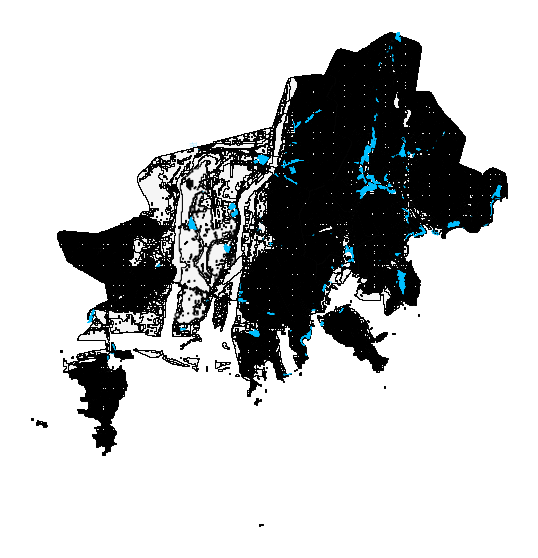

In [47]:
ax = data.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
bb.to_crs(epsg=5186).plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
a = pd.merge(wa_bu,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_bu, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_bu[wa_bu['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b]).reset_index().drop(columns = 'index')
data = data.drop(columns = 'geometry').drop_duplicates()
data_bu = data.copy()

In [49]:
wa_bu[wa_bu['침수시작'] == '20200724']

,침수시작,stnNm,sumRn,sumRnn,강수량
8124,20200724,부산,2.3,176.2,178.5


# 서귀포

In [ ]:
df = pd.read_csv('D:/data/전처리 완료 파일/서귀포.csv')
a = df[df['LV2_NAME'].isnull()].index

for i in df[df['LV2_NAME'].isnull()].index:
    df['LV2_NAME'].loc[i] = df['LV2_NAME'][i - 1]
for i in df[df['경사도'].isnull()].index:
    df['경사도'].loc[i] = df['경사도'][i - 1]
    
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry', crs = {'init': 'epsg:5186'})
data = data.rename(columns = {'고도':'godo'})
data = data.reset_index()


b = gpd.sjoin(data, target, how = 'left', op = 'intersects')
b['조사내용'] = b['조사내용'].fillna(0)
b = b.drop(columns = 'index_right')


bb = gpd.sjoin( target,b[b['조사내용'] != 0], how = 'inner').drop_duplicates()

z = list(bb['index'].unique())
d = b.query('index not in @z')
bb = bb.drop(columns = ['조사내용_left','침수시작_left','index_right'])
bb = bb.rename(columns = {'조사내용_right' : '조사내용','침수시작_right': '침수시작'})
d = pd.concat([d, bb])
d = d.reset_index().drop(columns = ['level_0','index','Unnamed: 0'])

In [51]:
d['침수시작'] = d.apply(lambda x: dt.strptime(x['침수시작'],'%Y%m%d') + datetime.timedelta(days = 1) if len(str(x['침수시작'])) >3 else x['침수시작'] , axis = 1)
d['침수시작'] = d['침수시작'].astype('str').apply(lambda x: x.replace('-',''))

<AxesSubplot:>

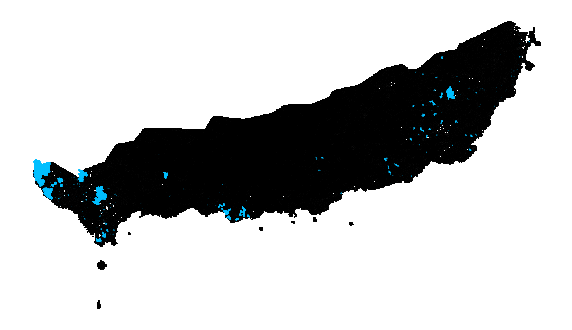

In [52]:
ax = data.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
bb.to_crs(epsg=5186).plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
a = pd.merge(wa_su,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_su, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_su[wa_su['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b]).reset_index().drop(columns = 'index')
data = data.drop(columns = 'geometry').drop_duplicates()
data_su = data.copy()

In [54]:
data_su

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20060701,서귀포,27.0,31.0,58.0,71678.0,56,과수원,1.0,5.661765,3068.693237,57.652677,67357.934439,43.259775,135.268576,4800.612490,6.30 집중호우 및 제 3호 테풍 에위니아
1,20060701,서귀포,27.0,31.0,58.0,71680.0,58,밭,1.0,5.711712,2901.986536,236.396055,67174.417157,100.202758,0.000000,4983.394202,6.30 집중호우 및 제 3호 테풍 에위니아
2,20060701,서귀포,27.0,31.0,58.0,72108.0,55,과수원,1.0,5.298969,2868.316719,428.731605,67293.172460,59.629932,0.000000,5031.207904,6.30 집중호우 및 제 3호 테풍 에위니아
3,20060701,서귀포,27.0,31.0,58.0,72109.0,56,밭,1.0,5.843750,2823.177546,516.517590,67256.714590,18.967256,0.000000,5091.202820,6.30 집중호우 및 제 3호 테풍 에위니아
4,20060701,서귀포,27.0,31.0,58.0,72110.0,57,과수원,1.0,5.294118,2780.219795,604.954588,67220.357446,0.000000,55.162096,5152.071363,6.30 집중호우 및 제 3호 테풍 에위니아
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88037,NaT,서귀포,16.5,0.8,17.3,87679.0,14,해양수,4.0,5.180000,14497.717640,573.443798,83561.103268,9067.099516,655.019407,8.497948,0
88038,NaT,서귀포,72.2,3.7,75.9,87680.0,18,해양수,4.0,4.489130,14509.454592,586.660334,83531.164107,9063.829105,655.031395,82.390567,0
88039,NaT,서귀포,13.0,5.0,18.0,87681.0,14,해양수,5.0,3.526316,14521.739851,612.032713,83501.311216,9061.451453,661.724609,9.550267,0
88040,NaT,서귀포,22.0,0.2,22.2,87682.0,9,해양수,6.0,4.246154,14598.654420,674.896123,83616.058948,9153.785219,745.029946,19.622112,0


# 제주

In [55]:
df

,Unnamed: 0,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,0,1.0,19,"POLYGON ((190302.765 99286.017, 190392.765 992...",과수원,3.0,0.000000,851.698441,520.243247,48746.142428,71.369738,178.195766,522.644324
1,1,2.0,13,"POLYGON ((190392.765 99286.017, 190482.765 992...",침엽수림,3.0,0.000000,800.881604,431.873524,48803.137187,0.000000,159.775630,434.787025
2,2,3.0,9,"POLYGON ((190482.765 99286.017, 190572.765 992...",밭,2.0,0.000000,600.746905,309.699280,48860.231242,0.000000,160.081139,314.528172
3,3,4.0,8,"POLYGON ((190572.765 99286.017, 190662.765 992...",밭,1.0,0.000000,722.446618,256.714682,48917.424244,83.966867,186.968848,259.526420
4,4,5.0,6,"POLYGON ((190662.765 99286.017, 190752.765 992...",밭,1.0,0.000000,697.486919,169.787515,48974.715848,173.913451,245.361648,173.041869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87678,87678,87679.0,14,"POLYGON ((131532.765 58246.017, 131622.765 582...",해양수,4.0,5.180000,14497.717640,573.443798,83561.103268,9067.099516,655.019407,8.497948
87679,87679,87680.0,18,"POLYGON ((131622.765 58246.017, 131712.765 582...",해양수,4.0,4.489130,14509.454592,586.660334,83531.164107,9063.829105,655.031395,82.390567
87680,87680,87681.0,14,"POLYGON ((131712.765 58246.017, 131802.765 582...",해양수,5.0,3.526316,14521.739851,612.032713,83501.311216,9061.451453,661.724609,9.550267
87681,87681,87682.0,9,"POLYGON ((131622.765 58156.017, 131712.765 581...",해양수,6.0,4.246154,14598.654420,674.896123,83616.058948,9153.785219,745.029946,19.622112


In [ ]:
df = pd.read_csv('제주.csv')
df['LV2_NAME'][0] = '0'
df['경사도'][0] = 30
a = df[df['LV2_NAME'].isnull()].index

for i in df[df['LV2_NAME'].isnull()].index:
    df['LV2_NAME'].loc[i] = df['LV2_NAME'][i - 1]
for i in df[df['경사도'].isnull()].index:
    df['경사도'].loc[i] = df['경사도'][i - 1]
    
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry', crs = {'init': 'epsg:5186'})
data = data.rename(columns = {'고도':'godo'})
data = data.reset_index()


b = gpd.sjoin(data, target, how = 'left', op = 'intersects')
b['조사내용'] = b['조사내용'].fillna(0)
b = b.drop(columns = 'index_right')


bb = gpd.sjoin( target,b[b['조사내용'] != 0], how = 'inner').drop_duplicates()

z = list(bb['index'].unique())
d = b.query('index not in @z')
bb = bb.drop(columns = ['조사내용_left','침수시작_left','index_right'])
bb = bb.rename(columns = {'조사내용_right' : '조사내용','침수시작_right': '침수시작'})
d = pd.concat([d, bb])
d = d.reset_index().drop(columns = ['level_0','index','Unnamed: 0'])

In [57]:
d['침수시작'] = d.apply(lambda x: dt.strptime(x['침수시작'],'%Y%m%d') + datetime.timedelta(days = 1) if len(str(x['침수시작'])) >3 else x['침수시작'] , axis = 1)
d['침수시작'] = d['침수시작'].astype('str').apply(lambda x: x.replace('-',''))

<AxesSubplot:>

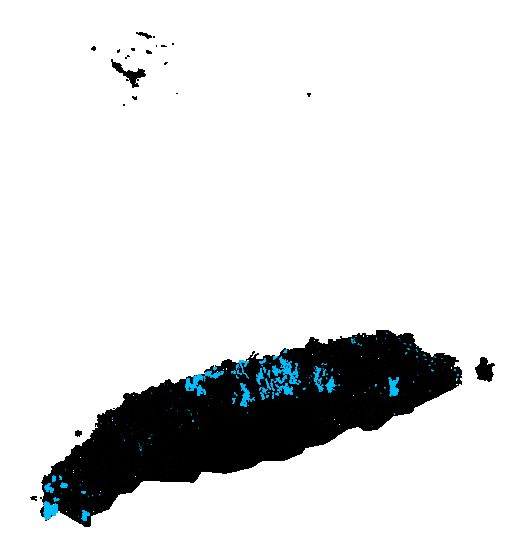

In [58]:
ax = data.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
bb.to_crs(epsg=5186).plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
a = pd.merge(wa_jj,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_jj, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_jj[wa_jj['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b]).reset_index().drop(columns = 'index')
data = data.drop(columns = 'geometry').drop_duplicates()
data_jj = data.copy()

In [60]:
data_jj

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20060701,제주,33.0,161.5,194.5,96452.0,27,하우스재배지,1.0,5.421053,2483.053540,172.648675,65390.786941,0.000000,0.000000,1807.666080,6.30 집중호우 및 제 3호 테풍 에위니아
1,20060701,제주,33.0,161.5,194.5,96640.0,26,하우스재배지,1.0,0.000000,2750.601831,118.923981,65416.955127,0.000000,105.227336,1683.568890,6.30 집중호우 및 제 3호 테풍 에위니아
2,20060701,제주,33.0,161.5,194.5,96642.0,32,밭,1.0,5.593750,2284.503168,97.477298,65459.801116,53.667276,23.166011,2199.893648,6.30 집중호우 및 제 3호 테풍 에위니아
3,20060701,제주,33.0,161.5,194.5,96731.0,25,밭,1.0,5.651515,2561.436804,271.158057,65563.065573,0.000000,8.506122,1632.738133,6.30 집중호우 및 제 3호 테풍 에위니아
4,20060701,제주,33.0,161.5,194.5,96734.0,34,밭,1.0,5.045045,2194.767157,187.226072,65520.593222,73.563230,113.166011,2310.818424,6.30 집중호우 및 제 3호 테풍 에위니아
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100150,NaT,제주,22.3,9.1,31.4,99135.0,55,과수원,1.0,0.000000,4665.223052,351.448903,68213.743075,236.486338,279.015565,7050.526621,0
100151,NaT,제주,73.0,28.7,101.7,99136.0,49,활엽수림,1.0,0.000000,4525.222534,39.708248,68529.550614,40.506517,195.670707,6520.491353,0
100152,NaT,제주,38.1,0.0,38.1,99137.0,50,활엽수림,1.0,0.000000,4558.180949,111.478045,68490.207666,113.417192,283.308622,6610.064983,0
100153,NaT,제주,33.0,161.5,194.5,99138.0,51,과수원,1.0,0.000000,4592.666780,188.241256,68450.960437,190.258624,372.075966,6699.650041,0


# 밀양

In [ ]:
df = pd.read_csv('밀양.csv')
a = df[df['LV2_NAME'].isnull()].index

for i in df[df['LV2_NAME'].isnull()].index:
    df['LV2_NAME'].loc[i] = df['LV2_NAME'][i - 1]
for i in df[df['경사도'].isnull()].index:
    df['경사도'].loc[i] = df['경사도'][i - 1]
    
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry', crs = {'init': 'epsg:5186'})
data = data.rename(columns = {'고도':'godo'})
data = data.reset_index()


b = gpd.sjoin(data, target, how = 'left', op = 'intersects')
b['조사내용'] = b['조사내용'].fillna(0)
b = b.drop(columns = 'index_right')


bb = gpd.sjoin( target,b[b['조사내용'] != 0], how = 'inner').drop_duplicates()

z = list(bb['index'].unique())
d = b.query('index not in @z')
bb = bb.drop(columns = ['조사내용_left','침수시작_left','index_right'])
bb = bb.rename(columns = {'조사내용_right' : '조사내용','침수시작_right': '침수시작'})
d = pd.concat([d, bb])
d = d.reset_index().drop(columns = ['level_0','index','Unnamed: 0'])

<AxesSubplot:>

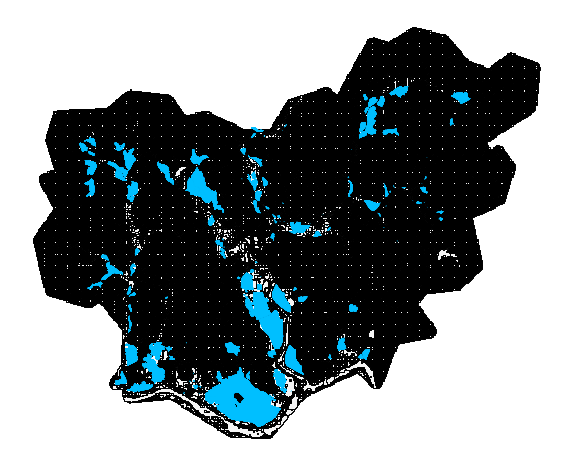

In [62]:
ax = data.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
bb.to_crs(epsg=5186).plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
a = pd.merge(wa_mi,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_mi, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_mi[wa_mi['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b]).reset_index().drop(columns = 'index')
data = data.drop(columns = 'geometry').drop_duplicates()
data_mi = data.copy()

In [64]:
data_mi

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용
0,20110709,밀양,245.0,16.0,261.0,27280.0,96,논,5.0,4.637363,409.757620,0.000000,7707.621918,0.000000,8.573535,2011년 집중호우
2,20110709,밀양,245.0,16.0,261.0,27281.0,98,내륙수,8.0,5.188406,479.191115,0.000000,7795.043080,0.000000,0.000000,2011년 집중호우
4,20110709,밀양,245.0,16.0,261.0,27670.0,85,주거지역,4.0,6.303371,282.553802,0.000000,7642.517521,0.000000,107.074919,2011년 집중호우
6,20110709,밀양,245.0,16.0,261.0,27671.0,92,논,5.0,6.248000,354.061391,0.000000,7729.627096,0.000000,39.570258,2011년 집중호우
8,20110709,밀양,245.0,16.0,261.0,27672.0,96,논,10.0,4.988636,432.530099,0.000000,7816.802162,0.000000,10.107986,2011년 집중호우
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96530,NaN,밀양,13.5,0.5,14.0,90908.0,4,내륙수,2.0,0.000000,1095.669488,412.451423,27698.978983,222.974488,1179.089426,0
96531,NaN,밀양,11.0,0.0,11.0,90909.0,5,내륙수,2.0,0.000000,769.856767,424.520912,27738.037019,258.599480,1112.083254,0
96532,NaN,밀양,54.5,10.5,65.0,90910.0,6,밭,2.0,0.000000,554.003884,424.137675,27896.625990,194.063884,868.344471,0
96533,NaN,밀양,17.0,0.0,17.0,90911.0,7,밭,0.0,0.000000,494.031636,404.577859,28018.014288,167.858483,790.855583,0


# 포항

In [ ]:
path = '포항'
file_list = os.listdir(path)

file_list_py = [file for file in file_list if file.endswith('.csv')]


df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i).rename(columns = {'fid':'fid_left'})
    print(i)
    print('-'*50)
    print(data.columns)
    df = pd.concat([df,data])
df = df.reset_index(drop = True)

포항 남구 데이터.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리', '해안가거리'],
      dtype='object')
포항 북구 데이터.csv
--------------------------------------------------
Index(['Unnamed: 0', 'fid_left', 'godo', 'geometry', 'LV2_NAME', '경사도', '습윤지수',
       '수문거리', '제방거리', '펌프장거리', '하천거리', '호수저수지거리', '해안가거리'],
      dtype='object')


In [ ]:
df['경사도'][0] = 2
a = df[df['LV2_NAME'].isnull()].index


for i in df[df['LV2_NAME'].isnull()].index:
    df['LV2_NAME'].loc[i] = df['LV2_NAME'][i - 1]
for i in df[df['경사도'].isnull()].index:
    df['경사도'].loc[i] = df['경사도'][i - 1]
    
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry', crs = {'init': 'epsg:5186'})
data = data.rename(columns = {'고도':'godo'})
data = data.reset_index()


b = gpd.sjoin(data, target, how = 'left', op = 'intersects')
b['조사내용'] = b['조사내용'].fillna(0)
b = b.drop(columns = 'index_right')


bb = gpd.sjoin( target,b[b['조사내용'] != 0], how = 'inner').drop_duplicates()

z = list(bb['index'].unique())
d = b.query('index not in @z')
bb = bb.drop(columns = ['조사내용_left','침수시작_left','index_right'])
bb = bb.rename(columns = {'조사내용_right' : '조사내용','침수시작_right': '침수시작'})
d = pd.concat([d, bb])
d = d.reset_index().drop(columns = ['level_0','index','Unnamed: 0'])

<AxesSubplot:>

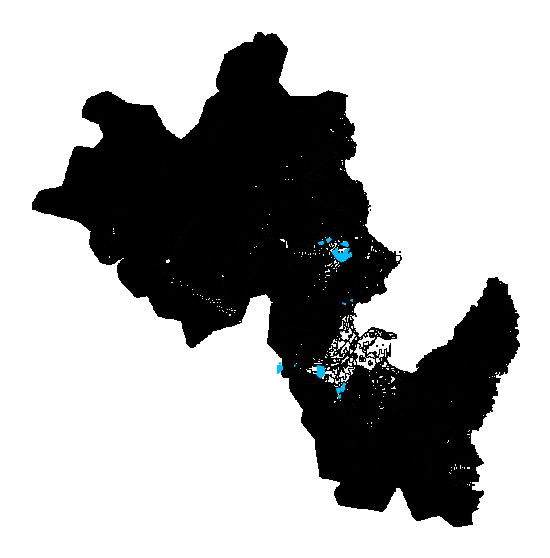

In [67]:
ax = data.plot(figsize=(10,10), color='whitesmoke', edgecolor='black', linewidth=1)
ax.axis('off')
bb.to_crs(epsg=5186).plot(ax=ax, color='deepskyblue', markersize=10)

In [ ]:
a = pd.merge(wa_po,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_po, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_po[wa_po['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b]).reset_index().drop(columns = 'index')
data = data.drop(columns = 'geometry').drop_duplicates()
data_po = data.copy()

# 데이터 합치기

In [71]:
data_mi['해안가거리'] = 17180.594379799597

In [72]:
data = pd.concat([data_bu, data_su, data_jj, data_mi, data_po]).reset_index().drop(columns = 'index')

In [73]:
data['조사내용'] = data['조사내용'].apply(lambda x: 1 if x != 0 else x)#

In [74]:
data

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20090716,부산,266.5,87.5,354.0,5708.0,2,기타나지,5.0,4.826087,2059.221776,0.000000,10732.693866,127.349328,744.588902,0.000000,1
1,20090716,부산,266.5,87.5,354.0,5777.0,5,기타나지,6.0,5.034483,1982.120713,0.000000,10659.724915,96.710889,831.858633,0.000000,1
2,20090716,부산,266.5,87.5,354.0,5845.0,10,밭,8.0,4.185567,1906.150761,0.000000,10587.018132,19.378159,862.032669,2.326970,1
3,20090716,부산,266.5,87.5,354.0,5904.0,0,기타나지,5.0,4.095238,1884.117313,0.000000,10461.235916,58.447491,898.054938,0.000000,1
4,20090716,부산,266.5,87.5,354.0,5912.0,9,밭,10.0,4.390476,1758.188591,6.719157,10442.412950,0.000000,779.919938,8.436509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468830,NaN,포항,13.0,0.0,13.0,87846.0,2,상업지역,0.0,0.000000,993.974992,326.400360,27083.254443,313.190425,448.032263,3596.555229,0
468831,NaN,포항,12.5,0.0,12.5,87847.0,2,주거지역,0.0,0.000000,1198.339866,457.703369,26933.469154,394.764652,459.127151,2839.541123,0
468832,NaN,포항,22.1,19.2,41.3,87848.0,3,상업지역,0.0,0.000000,1377.808217,468.670150,26913.207098,587.992672,469.933900,3015.523419,0
468833,NaN,포항,71.0,0.0,71.0,87849.0,4,상업지역,0.0,0.000000,870.763408,297.843373,27041.569449,188.509690,445.145872,3795.990420,0


# 컬럼데이터 범주화

In [75]:
data = data.drop(columns = ['fid_left','침수시작','stnNm'])
#datadf = data.drop(columns = ['fid_left','geometry','침수시작','stnNm'])

In [76]:
data['LV2_NAME'] = data['LV2_NAME'].astype('str')

In [77]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: x.replace(' ',''))

In [78]:
list_1 = ['주거지역', '공업지역', '상업지역','공공시설지역','교통지역', '교통시설지역', '문화·체육·휴양지역','위락시설지역']
list_2 = ['논', '밭', '시설재배지', '과수원', '기타재배지', '하우스재배지']
list_3 = ['침엽수림','혼효림','활엽수림']
list_4 = ['자연초지','골프장','기타초지','인공초지']
list_5 = ['내륙습지', '연안습지','내륙습지(수변식생)']
list_6 = ['기타나지','채광지역','자연나지']
list_7 = ['내륙수', '해양수']

In [79]:
def lv2(x):
    if x in list_1:
        return '시가화전조지역'
    elif x in list_2:
        return '농업지역'
    elif x in list_3:
        return '산림지역'
    elif x in list_4:
        return '초지'
    elif x in list_5:
        return '습지'
    elif x in list_6:
        return '나지'
    elif x in list_7:
        return '수역'
    else:
        '0'

In [80]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: lv2(x))

In [81]:
data

,sumRn,sumRnn,강수량,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,266.5,87.5,354.0,2,나지,5.0,4.826087,2059.221776,0.000000,10732.693866,127.349328,744.588902,0.000000,1
1,266.5,87.5,354.0,5,나지,6.0,5.034483,1982.120713,0.000000,10659.724915,96.710889,831.858633,0.000000,1
2,266.5,87.5,354.0,10,농업지역,8.0,4.185567,1906.150761,0.000000,10587.018132,19.378159,862.032669,2.326970,1
3,266.5,87.5,354.0,0,나지,5.0,4.095238,1884.117313,0.000000,10461.235916,58.447491,898.054938,0.000000,1
4,266.5,87.5,354.0,9,농업지역,10.0,4.390476,1758.188591,6.719157,10442.412950,0.000000,779.919938,8.436509,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468830,13.0,0.0,13.0,2,시가화전조지역,0.0,0.000000,993.974992,326.400360,27083.254443,313.190425,448.032263,3596.555229,0
468831,12.5,0.0,12.5,2,시가화전조지역,0.0,0.000000,1198.339866,457.703369,26933.469154,394.764652,459.127151,2839.541123,0
468832,22.1,19.2,41.3,3,시가화전조지역,0.0,0.000000,1377.808217,468.670150,26913.207098,587.992672,469.933900,3015.523419,0
468833,71.0,0.0,71.0,4,시가화전조지역,0.0,0.000000,870.763408,297.843373,27041.569449,188.509690,445.145872,3795.990420,0


In [82]:
data['godo'].unique()

array([   2,    5,   10, ..., 1859, 1843, 1816], dtype=int64)

# 원핫인코딩

In [83]:
data = pd.get_dummies(data,columns = ['LV2_NAME'])

In [84]:
data = data.drop_duplicates()

In [85]:
data[data['조사내용'] == 1]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,266.5,87.5,354.0,2,5.0,4.826087,2059.221776,0.000000,10732.693866,127.349328,744.588902,0.000000,1,1,0,0,0,0,0,0
1,266.5,87.5,354.0,5,6.0,5.034483,1982.120713,0.000000,10659.724915,96.710889,831.858633,0.000000,1,1,0,0,0,0,0,0
2,266.5,87.5,354.0,10,8.0,4.185567,1906.150761,0.000000,10587.018132,19.378159,862.032669,2.326970,1,0,1,0,0,0,0,0
3,266.5,87.5,354.0,0,5.0,4.095238,1884.117313,0.000000,10461.235916,58.447491,898.054938,0.000000,1,1,0,0,0,0,0,0
4,266.5,87.5,354.0,9,10.0,4.390476,1758.188591,6.719157,10442.412950,0.000000,779.919938,8.436509,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337241,13.1,309.2,322.3,7,0.0,6.047170,225.025922,198.787555,38900.054881,0.000000,417.999815,2722.999969,1,0,1,0,0,0,0,0
337242,13.1,309.2,322.3,5,0.0,0.000000,208.586558,298.326096,38709.836759,0.000000,562.854183,2737.431096,1,0,1,0,0,0,0,0
337243,13.1,309.2,322.3,5,0.0,0.000000,75.036560,232.818831,38497.077361,0.000000,554.716793,2514.563287,1,0,1,0,0,0,0,0
337244,13.1,309.2,322.3,8,0.0,0.000000,28.585330,221.038216,38543.211371,7.487974,757.723318,2912.291334,1,0,1,0,0,0,0,0


In [86]:
data[data['조사내용'] == 0]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
1617,15.0,0.0,15.0,1,1.0,0.0,157.570504,0.000000,29208.005289,26.447544,1269.883962,15166.577764,0,0,0,0,0,0,1,0
1618,32.0,20.5,52.5,2,0.0,0.0,858.692787,167.579185,29852.776305,0.000000,932.330843,14893.611772,0,0,1,0,0,0,0,0
1619,10.5,4.0,14.5,2,1.0,0.0,282.681216,0.000000,29143.274333,60.411167,991.788870,14882.593571,0,0,0,0,0,0,1,0
1620,51.3,1.1,52.4,2,0.0,0.0,595.585280,0.000000,30039.062529,0.000000,650.200125,14752.532049,0,0,1,0,0,0,0,0
1621,40.5,14.0,54.5,4,0.0,0.0,330.665092,207.154644,30181.888588,0.000000,329.458984,14526.894979,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468830,13.0,0.0,13.0,2,0.0,0.0,993.974992,326.400360,27083.254443,313.190425,448.032263,3596.555229,0,0,0,0,0,0,1,0
468831,12.5,0.0,12.5,2,0.0,0.0,1198.339866,457.703369,26933.469154,394.764652,459.127151,2839.541123,0,0,0,0,0,0,1,0
468832,22.1,19.2,41.3,3,0.0,0.0,1377.808217,468.670150,26913.207098,587.992672,469.933900,3015.523419,0,0,0,0,0,0,1,0
468833,71.0,0.0,71.0,4,0.0,0.0,870.763408,297.843373,27041.569449,188.509690,445.145872,3795.990420,0,0,0,0,0,0,1,0


# 학습데이터 검증데이터 분리

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
df,dff = train_test_split(data, test_size = 0.2, shuffle = True, stratify=data['조사내용'], random_state=42)

In [89]:
dff = dff.reset_index().drop(columns = 'index')
df = df.reset_index().drop(columns = 'index')
data = df.copy()

In [90]:
df

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,14.5,0.5,15.0,702,29.0,3.861789,2118.120197,1938.922471,24168.096208,30.465269,2093.605300,17180.594380,0,0,0,0,0,0,0,1
1,13.5,0.0,13.5,422,4.0,5.528796,1923.245479,55.075028,60439.707659,0.000000,56.014949,5452.177313,0,0,1,0,0,0,0,0
2,47.4,0.0,47.4,435,7.0,2.543478,963.714631,413.098366,56482.318213,103.137573,1761.128821,23034.306074,0,0,0,1,0,0,0,0
3,129.5,4.6,134.1,6,6.0,5.200000,254.977780,34.825020,19021.789397,0.000000,914.217605,17180.594380,1,0,0,1,0,0,0,0
4,51.3,1.1,52.4,25,6.0,2.915663,3284.611290,40.938496,13644.846143,766.885379,588.508641,11.237899,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375011,53.3,4.3,57.6,146,10.0,4.022472,309.901505,52.621412,14863.113255,42.303972,156.320708,17180.594380,0,0,1,0,0,0,0,0
375012,12.5,0.0,12.5,158,14.0,1.943396,294.642368,245.691647,2084.494787,3.532234,566.508958,17180.594380,0,0,0,1,0,0,0,0
375013,27.5,0.0,27.5,205,24.0,2.726562,364.620421,196.727249,11605.816185,0.000000,327.851052,17180.594380,0,0,0,1,0,0,0,0
375014,80.0,0.0,80.0,262,6.0,5.118812,3292.534837,1748.691905,43272.254606,89.638976,528.555468,9624.761716,0,0,1,0,0,0,0,0


In [91]:
dff

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,10.5,0.0,10.5,1688,10.0,4.943089,1576.022915,5100.575276,51640.320845,237.545926,917.702949,13075.713424,0,0,0,1,0,0,0,0
1,18.0,0.0,18.0,60,1.0,4.609756,3878.313110,401.937282,51142.527933,406.690386,534.172240,3939.250614,0,0,1,0,0,0,0,0
2,15.1,17.3,32.4,27,8.0,5.808989,2.189024,346.223149,22513.243353,0.000000,0.000000,1506.108813,0,0,1,0,0,0,0,0
3,45.0,4.5,49.5,451,16.0,4.581395,2312.976318,2260.264157,54520.824482,0.000000,3297.888251,8014.181363,0,0,0,1,0,0,0,0
4,38.5,2.8,41.3,91,13.0,1.875000,390.682315,102.098286,18414.583884,0.000000,1054.751000,7417.894529,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93750,16.6,0.0,16.6,42,8.0,4.348624,261.028683,16.520445,11043.264920,20.796408,211.334079,17180.594380,0,0,0,0,0,0,1,0
93751,10.5,0.0,10.5,66,1.0,5.260417,3539.834555,568.103054,67510.098627,131.950893,155.667058,4336.794107,0,0,0,1,0,0,0,0
93752,11.0,32.5,43.5,233,4.0,5.364198,4543.347270,1468.654728,39014.526391,677.295283,911.876500,6238.760650,0,0,1,0,0,0,0,0
93753,133.1,0.0,133.1,49,2.0,5.952191,5041.140609,3.046583,59984.057865,0.000000,198.307505,1723.126511,0,0,1,0,0,0,0,0


In [92]:
len(df) + len(dff)

468771

# 학습데이터 증강

In [93]:
df_1 = df[df['조사내용'] != 0]
df_2 = df[df['조사내용'] != 0]
df_3 = df[df['조사내용'] != 0]
df_4 = df[df['조사내용'] != 0]
df_5 = df[df['조사내용'] != 0]

In [ ]:
df_2['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_2['강수량'] = df_2['sumRn'] + df_2['sumRnn'] 

In [ ]:
df_3['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_3['강수량'] = df_2['sumRn'] + df_2['sumRnn'] 

In [ ]:
df_4['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_4['강수량'] = df_4['sumRn'] + df_4['sumRnn'] 

In [97]:
df_10 = pd.concat([df_2, df_3, df_4])
df_11 = pd.concat([df_2, df_3, df_4])

In [98]:
df_11['sumRn'] = df_10['sumRn'].apply(lambda x: x - np.random.randint(20)).values
df_11['강수량'] = df_11['sumRn'] + df_11['sumRnn'] 

In [99]:
data = pd.concat([df,df_10,df_11])
data = sklearn.utils.shuffle(data).reset_index().drop(columns = 'index')
dff = dff.reset_index().drop(columns = 'index')

In [100]:
data[data['조사내용'] == 1]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
4,114.3,2.9,117.2,52,2.0,0.000000,3358.341596,977.605300,67963.127133,155.551254,438.324006,5775.108711,1,0,1,0,0,0,0,0
9,197.0,4.2,201.2,7,0.0,7.668097,0.000000,0.000000,21960.982020,0.000000,19.393306,17180.594380,1,0,1,0,0,0,0,0
23,96.0,31.0,127.0,16,2.0,6.194175,6836.649353,384.214885,69236.220517,0.000000,385.534941,904.050832,1,0,1,0,0,0,0,0
26,46.2,10.5,49.7,202,2.0,6.175676,5111.038443,97.997857,39512.359115,191.522669,423.023787,6550.334215,1,0,1,0,0,0,0,0
31,106.9,0.3,107.2,35,30.0,3.795918,814.835042,43.037838,11984.535153,6.085438,35.023657,17180.594380,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441023,206.0,193.2,399.2,210,3.0,5.759259,227.869992,70.625669,40605.924153,0.000000,465.655043,5998.552781,1,0,1,0,0,0,0,0
441029,30.2,10.5,40.7,316,2.0,5.562500,4434.979803,543.431487,40526.992819,302.322547,397.124637,7649.669886,1,0,1,0,0,0,0,0
441033,103.4,310.0,413.4,57,1.0,0.000000,2803.246536,1467.785152,67683.914043,41.940816,305.158784,5366.578574,1,0,1,0,0,0,0,0
441034,208.5,4.6,213.1,51,8.0,4.642857,17.326625,0.000000,12386.743254,0.000000,16.877601,17180.594380,1,0,0,0,0,0,0,1


In [101]:
data[data['조사내용'] == 0]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,33.0,0.0,33.0,88,5.0,3.523364,684.949858,232.712480,42311.455970,57.165379,207.146851,4231.338558,0,0,0,1,0,0,0,0
1,29.0,0.5,29.5,670,25.0,3.195652,868.458772,818.566912,52614.551714,37.320847,942.094898,12615.471832,0,0,0,1,0,0,0,0
2,30.0,28.0,58.0,4,2.0,8.000000,1349.199181,0.000000,45886.375023,792.028641,1115.354674,0.000000,0,0,0,0,0,0,1,0
3,41.9,0.0,41.9,38,19.0,2.810345,3663.812485,498.946171,22766.774970,483.813233,518.275214,0.000000,0,0,0,1,0,0,0,0
5,97.0,0.4,97.4,7,5.0,4.931818,629.594676,128.603344,26496.977004,0.000000,56.526213,17180.594380,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441032,11.5,0.2,11.7,3,0.0,0.000000,2003.135922,0.000000,12408.618695,0.000000,112.227655,1298.066557,0,0,1,0,0,0,0,0
441035,19.5,0.5,20.0,88,4.0,4.393443,1207.805567,56.317780,49812.084384,63.935222,639.705103,2956.717590,0,0,1,0,0,0,0,0
441037,49.0,0.5,49.5,36,5.0,3.670330,1734.055168,242.126165,33582.400966,128.081838,244.749760,1910.317968,0,0,1,0,0,0,0,0
441038,11.7,7.3,19.0,996,17.0,0.000000,4634.264748,3762.359411,53108.748734,127.543603,1056.684603,12772.078434,0,0,0,1,0,0,0,0


In [102]:
dff

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,10.5,0.0,10.5,1688,10.0,4.943089,1576.022915,5100.575276,51640.320845,237.545926,917.702949,13075.713424,0,0,0,1,0,0,0,0
1,18.0,0.0,18.0,60,1.0,4.609756,3878.313110,401.937282,51142.527933,406.690386,534.172240,3939.250614,0,0,1,0,0,0,0,0
2,15.1,17.3,32.4,27,8.0,5.808989,2.189024,346.223149,22513.243353,0.000000,0.000000,1506.108813,0,0,1,0,0,0,0,0
3,45.0,4.5,49.5,451,16.0,4.581395,2312.976318,2260.264157,54520.824482,0.000000,3297.888251,8014.181363,0,0,0,1,0,0,0,0
4,38.5,2.8,41.3,91,13.0,1.875000,390.682315,102.098286,18414.583884,0.000000,1054.751000,7417.894529,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93750,16.6,0.0,16.6,42,8.0,4.348624,261.028683,16.520445,11043.264920,20.796408,211.334079,17180.594380,0,0,0,0,0,0,1,0
93751,10.5,0.0,10.5,66,1.0,5.260417,3539.834555,568.103054,67510.098627,131.950893,155.667058,4336.794107,0,0,0,1,0,0,0,0
93752,11.0,32.5,43.5,233,4.0,5.364198,4543.347270,1468.654728,39014.526391,677.295283,911.876500,6238.760650,0,0,1,0,0,0,0,0
93753,133.1,0.0,133.1,49,2.0,5.952191,5041.140609,3.046583,59984.057865,0.000000,198.307505,1723.126511,0,0,1,0,0,0,0,0


# 스케일링

In [103]:
data.columns

Index(['sumRn', 'sumRnn', '강수량', 'godo', '경사도', '습윤지수', '수문거리', '제방거리',
       '펌프장거리', '하천거리', '호수저수지거리', '해안가거리', '조사내용', 'LV2_NAME_나지',
       'LV2_NAME_농업지역', 'LV2_NAME_산림지역', 'LV2_NAME_수역', 'LV2_NAME_습지',
       'LV2_NAME_시가화전조지역', 'LV2_NAME_초지'],
      dtype='object')

In [104]:
dff.columns

Index(['sumRn', 'sumRnn', '강수량', 'godo', '경사도', '습윤지수', '수문거리', '제방거리',
       '펌프장거리', '하천거리', '호수저수지거리', '해안가거리', '조사내용', 'LV2_NAME_나지',
       'LV2_NAME_농업지역', 'LV2_NAME_산림지역', 'LV2_NAME_수역', 'LV2_NAME_습지',
       'LV2_NAME_시가화전조지역', 'LV2_NAME_초지'],
      dtype='object')

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
col = list(data.columns)
col.remove('조사내용')

#scaler = StandardScaler()
scaler = RobustScaler()

data[col] = scaler.fit_transform(data[col])
dff[col] = scaler.transform(dff[col])

In [106]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,0.134804,-0.088889,-0.058511,-0.224138,-0.083333,-0.296341,-0.230888,-0.152762,0.120096,0.088230,-0.388668,-0.310035,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.036765,-0.066667,-0.105053,1.782759,1.583333,-0.444006,-0.119145,0.907947,0.453119,-0.027095,0.921556,0.297711,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061275,1.155556,0.273936,-0.513793,-0.333333,1.720799,0.173590,-0.574095,0.235647,4.358855,1.230433,-0.616754,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.352941,-0.088889,0.059840,-0.396552,1.083333,-0.617623,1.583019,0.329263,-0.511642,2.567675,0.165994,-0.616754,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.127451,0.040000,1.061170,-0.348276,-0.333333,-1.883944,1.397009,1.195891,0.949227,0.659995,0.023461,-0.198130,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441035,-0.196078,-0.066667,-0.231383,-0.224138,-0.166667,0.095710,0.087492,-0.472130,0.362536,0.127573,0.382472,-0.402429,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441036,-0.649510,11.711111,3.046543,-0.289655,-0.250000,0.718230,-0.126606,0.394307,0.847886,2.020009,-0.472692,-0.559369,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441037,0.526961,-0.066667,0.160904,-0.403448,-0.083333,-0.230120,0.407939,-0.135718,-0.162051,0.500358,-0.321632,-0.478280,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441038,-0.387255,0.235556,-0.244681,2.906897,0.916667,-1.883944,2.173952,6.237779,0.469093,0.497230,1.125840,0.309063,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
dff

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,-0.416667,-0.088889,-0.357713,5.293103,0.333333,0.343377,0.311709,8.660663,0.421630,1.136504,0.878071,0.331073,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.232843,-0.088889,-0.257979,-0.320690,-0.416667,0.193179,1.713634,0.153625,0.405540,2.119479,0.194334,-0.331207,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.303922,0.680000,-0.066489,-0.434483,0.166667,0.733545,-0.646639,0.052753,-0.519836,-0.243984,-0.757958,-0.507580,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.428922,0.111111,0.160904,1.027586,0.833333,0.180400,0.760459,3.518187,0.514735,-0.243984,5.121331,-0.035825,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.269608,0.035556,0.051862,-0.213793,0.583333,-1.039083,-0.410076,-0.389243,-0.652316,-0.243984,1.122392,-0.079049,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93750,-0.267157,-0.088889,-0.276596,-0.382759,0.166667,0.075515,-0.489025,-0.544185,-0.890577,-0.123126,-0.381204,0.628626,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93751,-0.416667,-0.088889,-0.357713,-0.300000,-0.416667,0.486362,1.507525,0.454474,0.934584,0.522843,-0.480444,-0.302390,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
93752,-0.404412,1.355556,0.081117,0.275862,-0.166667,0.533125,2.118590,2.084952,0.013530,3.692087,0.867684,-0.164521,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93753,2.588235,-0.088889,1.272606,-0.358621,-0.333333,0.798071,2.421709,-0.568579,0.691322,-0.243984,-0.404427,-0.491849,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 샘플 모델링

In [108]:
data.isnull().sum()

sumRn               0
sumRnn              0
강수량                 0
godo                0
경사도                 0
습윤지수                0
수문거리                0
제방거리                0
펌프장거리               0
하천거리                0
호수저수지거리             0
해안가거리               0
조사내용                0
LV2_NAME_나지         0
LV2_NAME_농업지역       0
LV2_NAME_산림지역       0
LV2_NAME_수역         0
LV2_NAME_습지         0
LV2_NAME_시가화전조지역    0
LV2_NAME_초지         0
dtype: int64

In [109]:
# qw = data.drop(columns = '경사도')
# qww = dff.drop(columns = '경사도')

In [110]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [111]:
n_splits = 10
sfk = StratifiedKFold(n_splits = n_splits,shuffle=True, random_state = 42)

#y_pred = np.zeros(len(X_test))

y = data['조사내용']
X = data.drop(columns = '조사내용')

y_test = dff['조사내용']
X_test = dff.drop(columns = '조사내용')


# y_test = dff[dff['조사내용'] != 0]['조사내용']
# X_test = dff[dff['조사내용'] != 0].drop(columns = '조사내용')

In [112]:
from sklearn.metrics import f1_score

def evaluate_macroF1_lgb(truth, predictions):  

    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483

    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)

    f1 = f1_score(truth, pred_labels, average='macro')

    return ('macroF1', f1, True) 

# LGBM

In [ ]:
acu_av = []
f1_av = []
# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    lgbmm = LGBMClassifier(n_estimators = 1000, 
                          learning_rate= 0.05,
                          objective = 'binary',
                          max_depth = 30,
                          min_data_in_leaf = 50,
                          num_leaves = 1000,
                          metric = 'binary_logloss',
                          random_state = 42,
                          n_jobs = -1,
                          num_iterations = 1000,
                          scale_pos_weight=10)
    lgbmm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbmm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91004
           1       0.95      0.99      0.97      2751

    accuracy                           1.00     93755
   macro avg       0.97      0.99      0.98     93755
weighted avg       1.00      1.00      1.00     93755



# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
X

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,0.134804,-0.088889,-0.058511,-0.224138,-0.083333,-0.296341,-0.230888,-0.152762,0.120096,0.088230,-0.388668,-0.310035,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.036765,-0.066667,-0.105053,1.782759,1.583333,-0.444006,-0.119145,0.907947,0.453119,-0.027095,0.921556,0.297711,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061275,1.155556,0.273936,-0.513793,-0.333333,1.720799,0.173590,-0.574095,0.235647,4.358855,1.230433,-0.616754,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.352941,-0.088889,0.059840,-0.396552,1.083333,-0.617623,1.583019,0.329263,-0.511642,2.567675,0.165994,-0.616754,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.127451,0.040000,1.061170,-0.348276,-0.333333,-1.883944,1.397009,1.195891,0.949227,0.659995,0.023461,-0.198130,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441035,-0.196078,-0.066667,-0.231383,-0.224138,-0.166667,0.095710,0.087492,-0.472130,0.362536,0.127573,0.382472,-0.402429,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441036,-0.649510,11.711111,3.046543,-0.289655,-0.250000,0.718230,-0.126606,0.394307,0.847886,2.020009,-0.472692,-0.559369,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441037,0.526961,-0.066667,0.160904,-0.403448,-0.083333,-0.230120,0.407939,-0.135718,-0.162051,0.500358,-0.321632,-0.478280,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441038,-0.387255,0.235556,-0.244681,2.906897,0.916667,-1.883944,2.173952,6.237779,0.469093,0.497230,1.125840,0.309063,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 15,
                             criterion = 'gini',
                             min_samples_leaf = 50,
                             class_weight = 'balanced_subsample',
                             verbose = 100,
                             random_state = 42)
rfc.fit(X, y)

In [ ]:
#예측
y_pred = rfc.predict(X_test)

#정확도 측정
acu = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('교차검증 정확도 :',acu)
print('교차검증 f1 :', f1)

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     91004
           1       0.72      0.98      0.83      2751

    accuracy                           0.99     93755
   macro avg       0.86      0.98      0.91     93755
weighted avg       0.99      0.99      0.99     93755



# XGboost

In [120]:
from xgboost import XGBClassifier

In [ ]:
acu_av = []
f1_av = []






# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    lgbm = XGBClassifier(n_estimators = 1000, 
                         learning_rate= 0.05,
                         objective = 'binary:logistic',
                         max_depth = 15,
                         min_data_in_leaf = 50,
                         num_leaves = 1000,
                         metric = 'binary_logloss',
                         seed = 42,
                         n_jobs = -1,scale_pos_weight=10)
    lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91004
           1       0.96      0.99      0.97      2751

    accuracy                           1.00     93755
   macro avg       0.98      0.99      0.99     93755
weighted avg       1.00      1.00      1.00     93755



# 로지스틱

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
logreg = LogisticRegression()

logreg.fit(X,y )

# scores = cross_val_score(logreg, X, y)

# print("교차 검증 점수: {}".format(scores))

In [125]:
#예측
y_pred = logreg.predict(X_test)

#정확도 측정
acu = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('교차검증 정확도 :',acu)
print('교차검증 f1 :', f1)

교차검증 정확도 : 0.9742627059890139
교차검증 f1 : 0.6277957735616226


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     91004
           1       0.55      0.74      0.63      2751

    accuracy                           0.97     93755
   macro avg       0.77      0.86      0.81     93755
weighted avg       0.98      0.97      0.98     93755



# GradientBoostingClassifier

# gbm

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
acu_av = []
f1_av = []






# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    gbm = XGBClassifier(n_estimators = 1000, 
                         learning_rate= 0.05,
                         objective = 'binary:logistic',
                         max_depth = 15,
                         min_data_in_leaf = 50,
                         num_leaves = 1000,
                         metric = 'binary_logloss',
                         seed = 42,
                        n_jobs = -1,
                          num_iterations = 1000,
                          scale_pos_weight=10)
    gbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91004
           1       0.96      0.99      0.97      2751

    accuracy                           1.00     93755
   macro avg       0.98      0.99      0.99     93755
weighted avg       1.00      1.00      1.00     93755



# 변수중요도

In [130]:
ip_lgbm = list(lgbm.feature_importances_)
ip_lgbmm = list(lgbmm.feature_importances_)
ip_rf = list(rfc.feature_importances_)
ip_gbm = list(gbm.feature_importances_)

In [131]:
ip = pd.DataFrame({'변수': list(X.columns)})

In [ ]:
ip['ip_xg'] = ip_lgbm
ip['ip_lgbm'] = ip_lgbmm
ip['ip_lgbm'] = ip['ip_lgbm'] / ip['ip_lgbm'].sum()
ip['ip_rf'] = ip_rf
ip['ip_gbm'] = ip_gbm

ip['변수'][0] = '당일 강수량'
ip['변수'][1] = '전일 강수량'
ip['변수'][2] = '합일 강수량'
ip['변수'][3] = '고도'

ip.sort_values(by = 'ip_xg')

In [133]:
ip

,변수,ip_xg,ip_lgbm,ip_rf,ip_gbm
0,당일 강수량,0.011851,0.092093,0.158188,0.011851
1,전일 강수량,0.059799,0.131337,0.196805,0.059799
2,합일 강수량,0.713730,0.076257,0.338682,0.713730
3,고도,0.036836,0.116138,0.059977,0.036836
4,경사도,0.007971,0.040179,0.026953,0.007971
5,습윤지수,0.004711,0.062538,0.019373,0.004711
6,수문거리,0.005622,0.094769,0.016219,0.005622
7,제방거리,0.006287,0.063624,0.020028,0.006287
8,펌프장거리,0.021297,0.128217,0.041343,0.021297
9,하천거리,0.003652,0.040565,0.003621,0.003652


In [134]:
ip = ip.set_index('변수').drop(index = ['당일 강수량','합일 강수량','전일 강수량']).reset_index()

In [135]:
ipip = ip.copy()
for i in ip.drop(columns = '변수').columns:
    ipip[i] = ip[i] / ip[i].sum()

In [ ]:
for i in ipip.drop(columns = '변수').columns:
    ipip[i].loc[9] = ipip[i].loc[9:].sum()

In [137]:
ipip['변수'].loc[9] = '토지피복도'

In [138]:
ipipp =ipip.loc[:9]

In [139]:
ipipp.to_csv('D:/변수중요도.csv')

In [140]:
rr = ipipp.groupby('변수').sum()

In [141]:
a = ipipp[['변수','ip_xg']].sort_values(by = 'ip_xg',ascending = False).reset_index().reset_index().set_index('변수').drop(columns = 'index')
b = ipipp[['변수','ip_lgbm']].sort_values(by = 'ip_lgbm',ascending = False).reset_index().reset_index().set_index('변수').drop(columns = 'index')
c = ipipp[['변수','ip_rf']].sort_values(by = 'ip_rf',ascending = False).reset_index().reset_index().set_index('변수').drop(columns = 'index')
d = ipipp[['변수','ip_gbm']].sort_values(by = 'ip_gbm',ascending = False).reset_index().reset_index().set_index('변수').drop(columns = 'index')

In [142]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

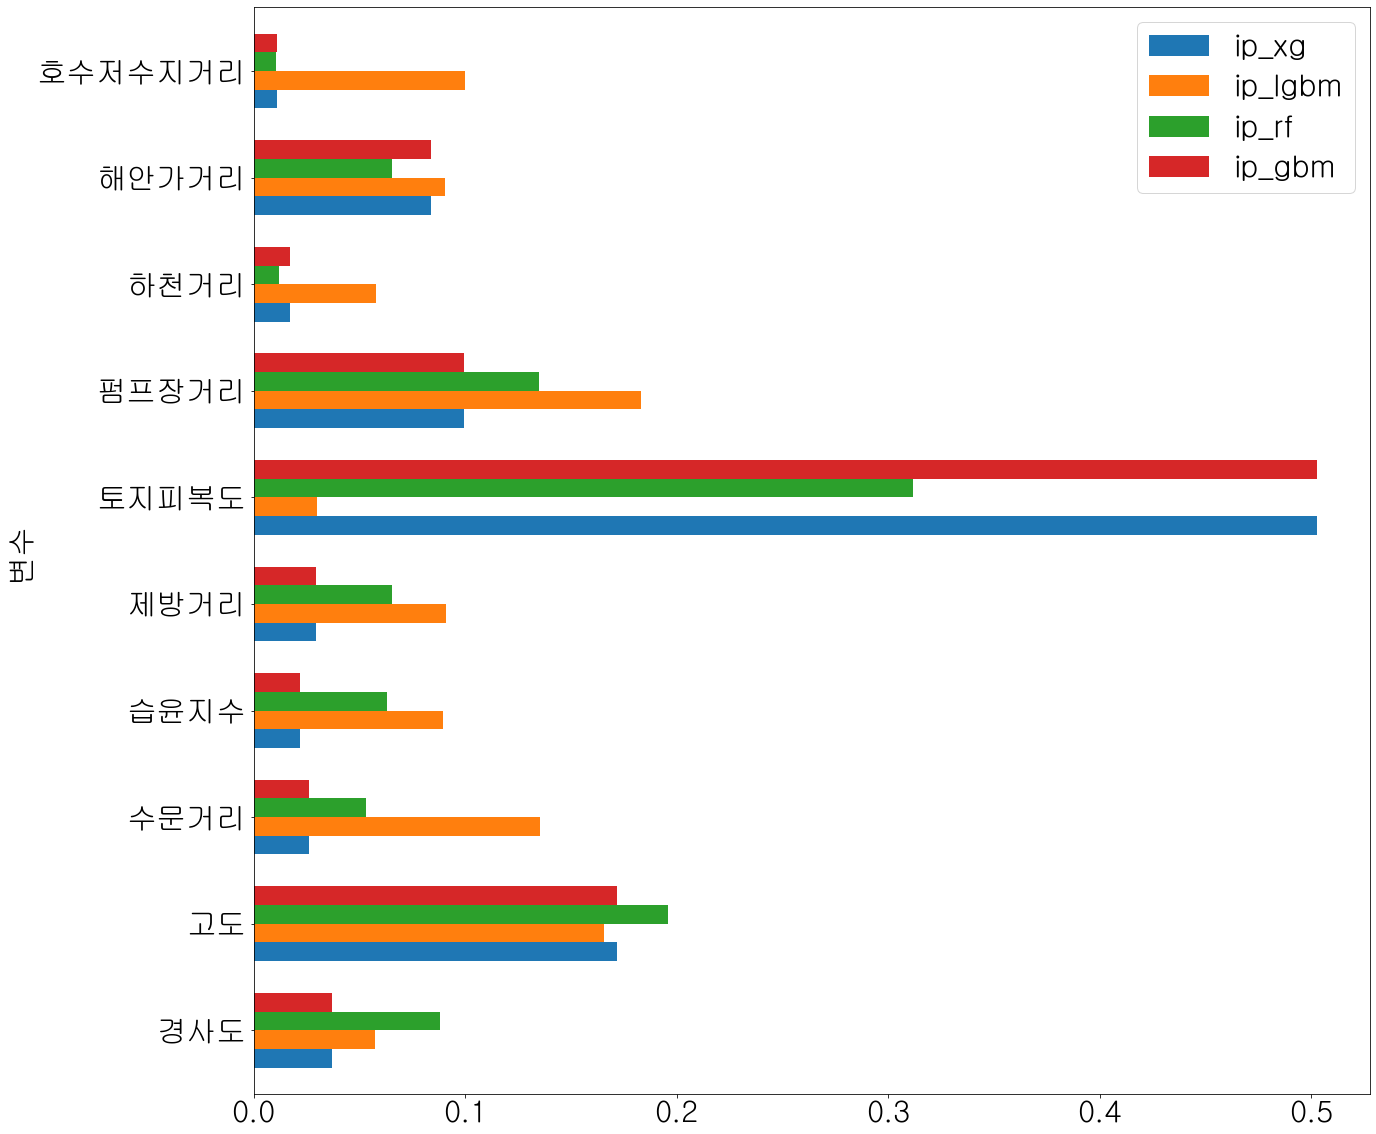

In [143]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 30

ax1 = rr.plot(kind = 'barh', width = 0.7)

In [144]:
# a['lgbm'] = b['변수']
# a['rf'] = c['변수']
# a['gbm'] = d['변수']

In [145]:
a

,level_0,ip_xg
변수,,
토지피복도,0,0.502541
고도,1,0.171636
펌프장거리,2,0.099232
해안가거리,3,0.083788
경사도,4,0.037139
제방거리,5,0.029296
수문거리,6,0.026195
습윤지수,7,0.021952
하천거리,8,0.017016


In [146]:
b

,level_0,ip_lgbm
변수,,
펌프장거리,0,0.183085
고도,1,0.165837
수문거리,2,0.135324
호수저수지거리,3,0.099768
제방거리,4,0.090851
해안가거리,5,0.090551
습윤지수,6,0.089300
하천거리,7,0.057924
경사도,8,0.057373


In [147]:
a['1'] = b['level_0']
a['2'] = c['level_0']
a['3'] = d['level_0']

In [148]:
a = a.drop(columns = 'ip_xg')

In [149]:
a['sum'] = a.T.sum().T

In [150]:
a

,level_0,1,2,3,sum
변수,,,,,
토지피복도,0,9,0,0,9
고도,1,1,1,1,4
펌프장거리,2,0,2,2,6
해안가거리,3,5,4,3,15
경사도,4,8,3,4,19
제방거리,5,4,5,5,19
수문거리,6,2,7,6,21
습윤지수,7,6,6,7,26
하천거리,8,7,8,8,31


In [151]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,0.134804,-0.088889,-0.058511,-0.224138,-0.083333,-0.296341,-0.230888,-0.152762,0.120096,0.088230,-0.388668,-0.310035,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.036765,-0.066667,-0.105053,1.782759,1.583333,-0.444006,-0.119145,0.907947,0.453119,-0.027095,0.921556,0.297711,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.061275,1.155556,0.273936,-0.513793,-0.333333,1.720799,0.173590,-0.574095,0.235647,4.358855,1.230433,-0.616754,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.352941,-0.088889,0.059840,-0.396552,1.083333,-0.617623,1.583019,0.329263,-0.511642,2.567675,0.165994,-0.616754,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.127451,0.040000,1.061170,-0.348276,-0.333333,-1.883944,1.397009,1.195891,0.949227,0.659995,0.023461,-0.198130,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441035,-0.196078,-0.066667,-0.231383,-0.224138,-0.166667,0.095710,0.087492,-0.472130,0.362536,0.127573,0.382472,-0.402429,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441036,-0.649510,11.711111,3.046543,-0.289655,-0.250000,0.718230,-0.126606,0.394307,0.847886,2.020009,-0.472692,-0.559369,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441037,0.526961,-0.066667,0.160904,-0.403448,-0.083333,-0.230120,0.407939,-0.135718,-0.162051,0.500358,-0.321632,-0.478280,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
441038,-0.387255,0.235556,-0.244681,2.906897,0.916667,-1.883944,2.173952,6.237779,0.469093,0.497230,1.125840,0.309063,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [152]:
dff[(dff['LV2_NAME_시가화전조지역'] == 1)]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
6,-0.281863,3.866667,0.898936,-0.479310,0.000000,0.057360,-0.396098,-0.440966,-0.316319,-0.243984,-0.472274,-0.607241,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23,2.818627,0.044444,1.437500,-0.482759,-0.416667,1.382854,1.019440,-0.535630,0.182553,0.551002,-0.297796,-0.572934,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27,0.066176,0.000000,-0.069149,-0.351724,0.000000,-1.883944,-0.253634,-0.352885,-0.524557,1.722242,-0.539487,0.482635,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51,0.723039,0.844444,0.539894,-0.496552,-0.250000,1.002666,0.333597,0.826292,-0.648854,1.540448,11.166248,0.482635,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67,0.737745,-0.013333,0.291223,-0.506897,-0.416667,-1.883944,0.615363,-0.466995,-0.766038,0.690548,1.799068,-0.551370,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93690,-0.318627,-0.022222,-0.284574,-0.489655,0.250000,-0.384650,0.022825,-0.489102,-0.464522,-0.193881,0.784300,-0.249473,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93696,-0.237745,-0.088889,-0.260638,-0.179310,0.583333,-0.055261,-0.540881,-0.574095,-1.020968,-0.243984,-0.631828,0.628626,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93719,-0.220588,-0.088889,-0.251330,0.282759,0.333333,-0.207907,-0.647972,-0.574095,-0.843327,-0.243984,2.562362,0.270910,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93727,0.414216,1.328889,0.517287,-0.513793,-0.416667,-1.883944,-0.196586,0.192562,-0.379606,2.282809,0.844660,-0.052315,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [153]:
dff[(dff['LV2_NAME_시가화전조지역'] == 1) &(dff['조사내용'] == 1)]

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
163,2.500000,0.115556,1.285904,-0.451724,-0.083333,-0.145293,-0.387355,-0.538750,-0.824963,-0.243984,0.065211,0.628626,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
190,3.644608,4.591111,3.246011,-0.503448,1263.381480,0.933556,0.411841,-0.369922,-0.641430,0.551720,0.249762,-0.509087,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
257,-0.012255,1.288889,0.273936,-0.386207,-0.416667,1.061394,0.367059,-0.397070,0.971711,-0.222917,-0.580711,-0.320375,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
287,4.154412,0.097778,2.178191,-0.506897,-0.333333,1.700822,-0.196621,-0.471657,-0.717239,-0.243984,-0.066550,0.628626,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
382,2.500000,0.115556,1.285904,-0.224138,0.166667,0.427494,-0.438411,-0.263806,-1.174336,-0.243984,0.554382,0.628626,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93205,5.330882,-0.088889,2.760638,-0.424138,-0.083333,0.934965,2.323976,0.875235,-0.797688,1.353727,1.361909,-0.558349,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93215,0.857843,1.244444,0.732713,-0.517241,1263.381480,-1.883944,-0.346051,-0.434277,-0.351525,2.498547,0.728154,-0.578100,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93564,-0.600490,18.577778,5.127660,-0.475862,-0.333333,1.215824,0.479456,0.351788,-0.109659,2.762356,1.156275,-0.570819,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93637,5.330882,-0.088889,2.760638,-0.462069,-0.250000,0.795898,1.962447,0.910735,-0.800544,1.720303,1.181209,-0.543944,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
dff[dff['조사내용'] == 1].describe()

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
count,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.0,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.000000,2751.00000
mean,0.913239,6.700243,2.395155,-0.256328,41.616278,0.271594,0.335699,-0.225543,-0.175016,0.360225,0.043559,0.009678,1.0,0.025445,0.659033,0.063977,0.017812,0.015631,0.196292,0.02181
std,1.676252,7.148675,1.779093,0.286777,226.020164,0.937086,1.125047,0.507112,0.606871,1.186575,1.150785,0.504103,0.0,0.157502,0.474120,0.244756,0.132291,0.124064,0.397264,0.14609
min,-0.674020,-0.088889,-0.497340,-0.527586,-0.500000,-1.883944,-0.647972,-0.574095,-1.223935,-0.243984,-0.757958,-0.616754,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-0.600490,0.377778,1.285904,-0.482759,-0.416667,0.128008,-0.431411,-0.574095,-0.644683,-0.243984,-0.481562,-0.471497,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.134804,3.382222,1.610372,-0.375862,-0.333333,0.479369,-0.070076,-0.429248,-0.104527,-0.243984,-0.133754,-0.167769,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.144608,11.808889,4.210106,-0.117241,-0.083333,0.785570,0.673454,-0.099357,0.082092,0.419024,0.262036,0.628626,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,5.857843,18.577778,5.127660,0.944828,1263.381480,4.574554,6.076242,2.997724,1.158927,10.066826,14.368999,0.628626,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# 창원시 마산구들 데이터 들고오기

In [ ]:
df = pd.read_csv('회원구 데이터.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
dataa = gpd.GeoDataFrame(df, geometry = 'geometry')
dataa.crs = {"init":"epsg:5186"}
dataa = dataa.dropna(subset = ['경사도','LV2_NAME'])

In [ ]:
df = pd.read_csv('합포구 데이터.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
dataa = gpd.GeoDataFrame(df, geometry = 'geometry')
dataa.crs = {"init":"epsg:5186"}
dataaa = dataa.dropna(subset = ['경사도','LV2_NAME'])

In [218]:
dataa

,Unnamed: 0,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,0,1.0,12,"POLYGON ((344071.061 293409.872, 344161.061 29...",기타나지,2.0,0.000000,2141.029303,216.270541,18704.471806,227.569709,2196.123782,1724.496716
1,1,2.0,8,"POLYGON ((344161.061 293409.872, 344251.061 29...",기타나지,2.0,0.000000,2227.167360,231.871263,18794.431528,242.618920,2191.884265,1711.157149
2,2,3.0,6,"POLYGON ((344251.061 293409.872, 344431.061 29...",기타나지,1.0,0.000000,2313.599452,259.641029,18884.391635,268.881458,2191.095913,1696.848575
3,3,4.0,9,"POLYGON ((343981.061 293319.872, 344071.061 29...",기타나지,1.0,0.000000,2029.318694,105.655602,18612.018095,119.422058,2114.533512,1654.790146
4,4,5.0,11,"POLYGON ((344071.061 293319.872, 344161.061 29...",기타나지,1.0,0.000000,2116.176348,127.554147,18701.989427,139.192550,2106.334961,1635.940185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30114,30114,30115.0,44,"POLYGON ((342451.061 274239.872, 342541.061 27...",혼효림,24.0,3.436170,6527.485541,394.905184,6124.966579,0.000000,1641.919817,101.158689
30115,30115,30116.0,42,"POLYGON ((342541.061 274239.872, 342631.061 27...",혼효림,20.0,2.440367,6517.823165,358.438844,6112.832938,25.994140,1676.006218,78.887201
30116,30116,30117.0,46,"POLYGON ((342631.061 274239.872, 342721.061 27...",혼효림,15.0,2.087719,6509.390918,342.354648,6102.002742,82.580190,1714.093331,0.924894
30117,30117,30118.0,33,"POLYGON ((342451.061 274149.872, 342541.061 27...",혼효림,13.0,2.905660,6616.904987,474.965541,6035.892525,0.000000,1726.336224,28.230145


In [219]:
dataaa

,Unnamed: 0,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,0,1.0,12,"POLYGON ((344071.061 293409.872, 344161.061 29...",기타나지,2.0,0.000000,2141.029303,216.270541,18704.471806,227.569709,2196.123782,1724.496716
1,1,2.0,8,"POLYGON ((344161.061 293409.872, 344251.061 29...",기타나지,2.0,0.000000,2227.167360,231.871263,18794.431528,242.618920,2191.884265,1711.157149
2,2,3.0,6,"POLYGON ((344251.061 293409.872, 344431.061 29...",기타나지,1.0,0.000000,2313.599452,259.641029,18884.391635,268.881458,2191.095913,1696.848575
3,3,4.0,9,"POLYGON ((343981.061 293319.872, 344071.061 29...",기타나지,1.0,0.000000,2029.318694,105.655602,18612.018095,119.422058,2114.533512,1654.790146
4,4,5.0,11,"POLYGON ((344071.061 293319.872, 344161.061 29...",기타나지,1.0,0.000000,2116.176348,127.554147,18701.989427,139.192550,2106.334961,1635.940185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30114,30114,30115.0,44,"POLYGON ((342451.061 274239.872, 342541.061 27...",혼효림,24.0,3.436170,6527.485541,394.905184,6124.966579,0.000000,1641.919817,101.158689
30115,30115,30116.0,42,"POLYGON ((342541.061 274239.872, 342631.061 27...",혼효림,20.0,2.440367,6517.823165,358.438844,6112.832938,25.994140,1676.006218,78.887201
30116,30116,30117.0,46,"POLYGON ((342631.061 274239.872, 342721.061 27...",혼효림,15.0,2.087719,6509.390918,342.354648,6102.002742,82.580190,1714.093331,0.924894
30117,30117,30118.0,33,"POLYGON ((342451.061 274149.872, 342541.061 27...",혼효림,13.0,2.905660,6616.904987,474.965541,6035.892525,0.000000,1726.336224,28.230145


In [220]:
dataa = pd.concat([dataa,dataaa])

In [221]:
data = dataa.copy()

In [222]:
data = data.reset_index().drop(columns = 'index')

In [223]:
data

,Unnamed: 0,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,0,1.0,12,"POLYGON ((344071.061 293409.872, 344161.061 29...",기타나지,2.0,0.000000,2141.029303,216.270541,18704.471806,227.569709,2196.123782,1724.496716
1,1,2.0,8,"POLYGON ((344161.061 293409.872, 344251.061 29...",기타나지,2.0,0.000000,2227.167360,231.871263,18794.431528,242.618920,2191.884265,1711.157149
2,2,3.0,6,"POLYGON ((344251.061 293409.872, 344431.061 29...",기타나지,1.0,0.000000,2313.599452,259.641029,18884.391635,268.881458,2191.095913,1696.848575
3,3,4.0,9,"POLYGON ((343981.061 293319.872, 344071.061 29...",기타나지,1.0,0.000000,2029.318694,105.655602,18612.018095,119.422058,2114.533512,1654.790146
4,4,5.0,11,"POLYGON ((344071.061 293319.872, 344161.061 29...",기타나지,1.0,0.000000,2116.176348,127.554147,18701.989427,139.192550,2106.334961,1635.940185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59025,30114,30115.0,44,"POLYGON ((342451.061 274239.872, 342541.061 27...",혼효림,24.0,3.436170,6527.485541,394.905184,6124.966579,0.000000,1641.919817,101.158689
59026,30115,30116.0,42,"POLYGON ((342541.061 274239.872, 342631.061 27...",혼효림,20.0,2.440367,6517.823165,358.438844,6112.832938,25.994140,1676.006218,78.887201
59027,30116,30117.0,46,"POLYGON ((342631.061 274239.872, 342721.061 27...",혼효림,15.0,2.087719,6509.390918,342.354648,6102.002742,82.580190,1714.093331,0.924894
59028,30117,30118.0,33,"POLYGON ((342451.061 274149.872, 342541.061 27...",혼효림,13.0,2.905660,6616.904987,474.965541,6035.892525,0.000000,1726.336224,28.230145


In [224]:
data['sumRn'] = 100
data['sumRnn'] = 100
data['강수량'] = 200

In [225]:
data = data.reset_index().drop(columns = 'index')

In [226]:
data = data.drop(columns = ['Unnamed: 0','fid_left','geometry'])

In [227]:
data.columns

Index(['godo', 'LV2_NAME', '경사도', '습윤지수', '수문거리', '제방거리', '펌프장거리', '하천거리',
       '호수저수지거리', '해안가거리', 'sumRn', 'sumRnn', '강수량'],
      dtype='object')

In [228]:
data = data.reindex(columns = ['sumRn', 'sumRnn', '강수량','godo', 'LV2_NAME', '경사도', '습윤지수', '수문거리', '제방거리', '펌프장거리', '하천거리','호수저수지거리','해안가거리'])

In [229]:
data

,sumRn,sumRnn,강수량,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,100,100,200,12,기타나지,2.0,0.000000,2141.029303,216.270541,18704.471806,227.569709,2196.123782,1724.496716
1,100,100,200,8,기타나지,2.0,0.000000,2227.167360,231.871263,18794.431528,242.618920,2191.884265,1711.157149
2,100,100,200,6,기타나지,1.0,0.000000,2313.599452,259.641029,18884.391635,268.881458,2191.095913,1696.848575
3,100,100,200,9,기타나지,1.0,0.000000,2029.318694,105.655602,18612.018095,119.422058,2114.533512,1654.790146
4,100,100,200,11,기타나지,1.0,0.000000,2116.176348,127.554147,18701.989427,139.192550,2106.334961,1635.940185
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59025,100,100,200,44,혼효림,24.0,3.436170,6527.485541,394.905184,6124.966579,0.000000,1641.919817,101.158689
59026,100,100,200,42,혼효림,20.0,2.440367,6517.823165,358.438844,6112.832938,25.994140,1676.006218,78.887201
59027,100,100,200,46,혼효림,15.0,2.087719,6509.390918,342.354648,6102.002742,82.580190,1714.093331,0.924894
59028,100,100,200,33,혼효림,13.0,2.905660,6616.904987,474.965541,6035.892525,0.000000,1726.336224,28.230145


In [230]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: lv2(x))

In [231]:
data = pd.get_dummies(data,columns = ['LV2_NAME'])

In [232]:
data[col] = scaler.transform(data[col])

In [233]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,1.776961,4.355556,2.162234,-0.486207,-0.333333,-1.883944,0.655756,-0.182530,-0.642946,1.078527,3.157167,-0.491749,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.776961,4.355556,2.162234,-0.500000,-0.333333,-1.883944,0.708208,-0.154285,-0.640038,1.165985,3.149609,-0.492716,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.776961,4.355556,2.162234,-0.506897,-0.416667,-1.883944,0.760839,-0.104007,-0.637131,1.318609,3.148204,-0.493754,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.776961,4.355556,2.162234,-0.496552,-0.416667,-1.883944,0.587733,-0.382802,-0.645935,0.450032,3.011713,-0.496802,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.776961,4.355556,2.162234,-0.489655,-0.416667,-1.883944,0.640623,-0.343154,-0.643026,0.564927,2.997097,-0.498169,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59025,1.776961,4.355556,2.162234,-0.375862,1.500000,-0.335631,3.326784,0.140893,-1.049550,-0.243984,2.169164,-0.609421,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59026,1.776961,4.355556,2.162234,-0.382759,1.166667,-0.784332,3.320900,0.074870,-1.049942,-0.092920,2.229931,-0.611036,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59027,1.776961,4.355556,2.162234,-0.368966,0.750000,-0.943233,3.315765,0.045749,-1.050292,0.235927,2.297831,-0.616687,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59028,1.776961,4.355556,2.162234,-0.413793,0.583333,-0.574674,3.381233,0.285845,-1.052429,-0.243984,2.319657,-0.614708,0.0,0.0,1.0,0.0,0.0,0.0,0.0


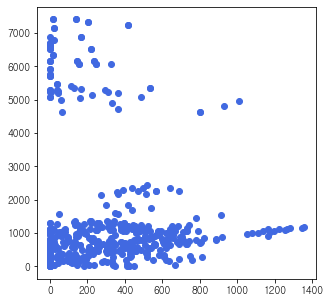

In [161]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10


plt.scatter(data_bu['하천거리'].loc[:1000],data_bu['호수저수지거리'].loc[:1000], color = 'royalblue')

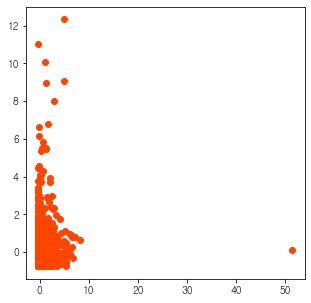

In [162]:
plt.scatter(data['하천거리'].loc[:1000],data['호수저수지거리'].loc[:1000], color = 'orangered')

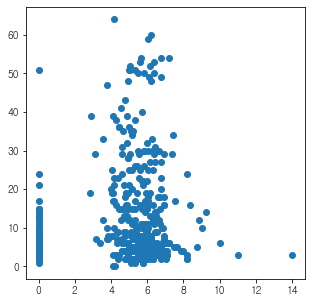

In [144]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10

plt.scatter(data_bu['습윤지수'].loc[:1000],data_bu['godo'].loc[:1000])

In [133]:
data_bu

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20090716,부산,266.5,87.5,354.0,5708.0,2,기타나지,5.0,4.826087,2059.221776,0.000000,10732.693866,127.349328,744.588902,0.000000,호우피해
2,20090716,부산,266.5,87.5,354.0,5777.0,5,기타나지,6.0,5.034483,1982.120713,0.000000,10659.724915,96.710889,831.858633,0.000000,호우피해
4,20090716,부산,266.5,87.5,354.0,5845.0,10,밭,8.0,4.185567,1906.150761,0.000000,10587.018132,19.378159,862.032669,2.326970,호우피해
6,20090716,부산,266.5,87.5,354.0,5904.0,0,기타나지,5.0,4.095238,1884.117313,0.000000,10461.235916,58.447491,898.054938,0.000000,호우피해
8,20090716,부산,266.5,87.5,354.0,5912.0,9,밭,10.0,4.390476,1758.188591,6.719157,10442.412950,0.000000,779.919938,8.436509,호우피해
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59716,NaN,부산,208.7,2.1,210.8,6968.0,18,침엽수림,13.0,3.971014,1214.241543,21.579933,12061.577789,1190.078067,577.375604,31.313544,0
59717,NaN,부산,32.5,0.0,32.5,6969.0,10,침엽수림,9.0,2.403101,1226.014776,10.430763,11984.053784,1202.764590,573.872986,21.562520,0
59718,NaN,부산,49.8,0.0,49.8,6970.0,11,기타나지,6.0,3.147541,1244.203334,49.339591,11906.705313,1221.965429,574.484463,0.000000,0
59719,NaN,부산,51.3,1.1,52.4,6971.0,2,기타나지,10.0,4.461538,1303.867412,0.000000,12016.258836,1279.625131,666.903085,0.000000,0
